In [2]:
pip install librosa

  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201381 sha256=abd0fc7589ecc2d3af422984d265eafd331fe83e6673cf0fb119a844b01713dc
  Stored in directory: c:\users\swetha\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=7a3993b24a6ab078a3048f54bbad1bcab2a9bf045ca4e12e205c1252ec088735
  Stored in directory: c:\users\swetha\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7

  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=ec69dedb3179bac1f8d74c01aacabb7b859fcb332455ab8b8aa67131c018e63c
  Stored in directory: c:\users\swetha\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built librosa audioread resampy


In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from mlxtend.classifier import MultiLayerPerceptron as MLP 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [2]:

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
            
#     print(result)
    return result

In [3]:

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust','neutral','surprised','sad','angry']

In [4]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("H:\\PROJECTS\\Ml package\\speech_reg\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)


In [6]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(1080, 360)


In [7]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [8]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=500)


In [9]:
# - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(200,),
              learning_rate='adaptive', max_iter=500)

In [10]:
# Predict for the test set
y_pred=model.predict(x_test)
def speech_res():    
    return y_pred



[[27  0  3  2  2  1  3 13]
 [ 0 34  0  1  0  0  8  2]
 [ 8  5  9  2  3  0  7  9]
 [ 1  1  0 23  5  0 10  4]
 [ 6  3  1  3 16  2 10 18]
 [ 0  7  1  0  1  3 12  7]
 [ 1  9  0  5  3  0 23  4]
 [ 1  5  0  0  2  0  2 32]]


<AxesSubplot:>

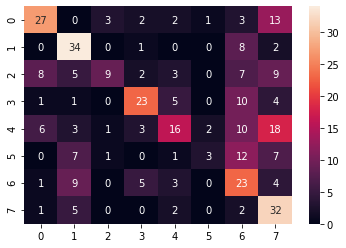

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
#Get the confusion matrix

In [12]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("ReLu-Accuracy: {:.2f}%".format(accuracy*100))

ReLu-Accuracy: 46.39%


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.61      0.53      0.57        51
        calm       0.53      0.76      0.62        45
     disgust       0.64      0.21      0.32        43
     fearful       0.64      0.52      0.57        44
       happy       0.50      0.27      0.35        59
     neutral       0.50      0.10      0.16        31
         sad       0.31      0.51      0.38        45
   surprised       0.36      0.76      0.49        42

    accuracy                           0.46       360
   macro avg       0.51      0.46      0.43       360
weighted avg       0.51      0.46      0.44       360



In [14]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=500,activation='logistic')


In [15]:
#Train the model
model.fit(x_train,y_train)

C:\Users\swetha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.01, batch_size=256,
              hidden_layer_sizes=(200,), learning_rate='adaptive',
              max_iter=500)

In [16]:
#Predict for the test set
y_pred=model.predict(x_test)
def speech_res():    
    return y_pred


[[32  0  3  3  2  0  4  7]
 [ 0 38  1  1  1  2  1  1]
 [ 7  1 24  3  4  1  0  3]
 [ 2  1  6 23  6  1  4  1]
 [ 9  3  2  1 31  1  5  7]
 [ 0  7  1  1  0 16  4  2]
 [ 2  6  1  6  2  4 23  1]
 [ 0  2  3  0  4  1  1 31]]


<AxesSubplot:>

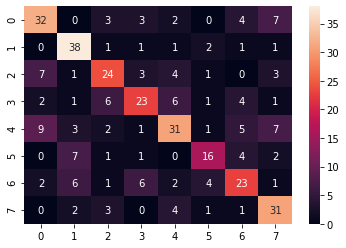

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
#Get the confusion matrix

In [18]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))

Logistic-Accuracy: 60.56%


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.62      0.63      0.62        51
        calm       0.66      0.84      0.74        45
     disgust       0.59      0.56      0.57        43
     fearful       0.61      0.52      0.56        44
       happy       0.62      0.53      0.57        59
     neutral       0.62      0.52      0.56        31
         sad       0.55      0.51      0.53        45
   surprised       0.58      0.74      0.65        42

    accuracy                           0.61       360
   macro avg       0.60      0.61      0.60       360
weighted avg       0.60      0.61      0.60       360



In [20]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=500,activation='tanh')


In [21]:
#Train the model
model.fit(x_train,y_train)

C:\Users\swetha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.01, batch_size=256,
              hidden_layer_sizes=(200,), learning_rate='adaptive',
              max_iter=500)

In [22]:
#Predict for the test set
y_pred=model.predict(x_test)
def speech_res():    
    return y_pred


[[30  0  4  2  6  0  5  4]
 [ 0 33  4  0  1  4  2  1]
 [11  3 23  4  2  0  0  0]
 [ 3  0  3 26  3  0  6  3]
 [ 6  2  1  7 30  2  4  7]
 [ 0  7  3  1  0 17  3  0]
 [ 2  5  2  6  2  1 25  2]
 [ 4  1  2  1  3  1  2 28]]


<AxesSubplot:>

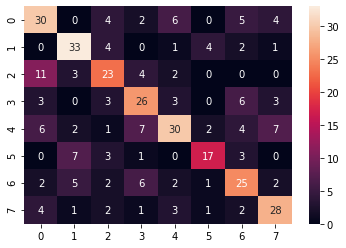

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
#Get the confusion matrix



In [24]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Tanh-Accuracy: {:.2f}%".format(accuracy*100))

Tanh-Accuracy: 58.89%


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.54      0.59      0.56        51
        calm       0.65      0.73      0.69        45
     disgust       0.55      0.53      0.54        43
     fearful       0.55      0.59      0.57        44
       happy       0.64      0.51      0.57        59
     neutral       0.68      0.55      0.61        31
         sad       0.53      0.56      0.54        45
   surprised       0.62      0.67      0.64        42

    accuracy                           0.59       360
   macro avg       0.59      0.59      0.59       360
weighted avg       0.59      0.59      0.59       360



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Fit the model
logreg = LogisticRegression(C=1e5)
logreg.fit(x_train,y_train)
#Generate predictions with the model using our X values
y_pred = logreg.predict(x_test)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[30  2  3  2  6  0  4  4]
 [ 0 29  6  1  0  0  7  2]
 [ 5  6 17  2  6  2  1  4]
 [ 4  3  0 17  7  0  7  6]
 [ 5  7  2  8 23  0  5  9]
 [ 0  8  9  3  2  0  6  3]
 [ 2 12  2  9  4  0 11  5]
 [ 3  3  1  4  4  1  4 22]]


C:\Users\swetha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))

Logistic-Accuracy: 41.39%


[[30  2  3  2  6  0  4  4]
 [ 0 29  6  1  0  0  7  2]
 [ 5  6 17  2  6  2  1  4]
 [ 4  3  0 17  7  0  7  6]
 [ 5  7  2  8 23  0  5  9]
 [ 0  8  9  3  2  0  6  3]
 [ 2 12  2  9  4  0 11  5]
 [ 3  3  1  4  4  1  4 22]]


<AxesSubplot:>

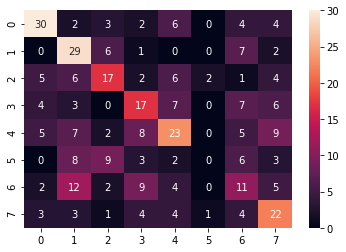

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
#Get the confusion matrix